In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install pandas
!pip install requests
!pip install html5lib 
!pip install lxml
!pip install plotly

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Question 1 Use yfinance to Extract Stock Data
# Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. 

In [59]:
TESLA = yf.Ticker("TSLA")
tesla_data=TESLA.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data
#Displaythe last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [51]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).content
soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find('table')
table_rows = table.find_all('tr')
data = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    data.append(row)
tesla_revenue = pd.DataFrame(data)
tesla_revenue.columns = ['Date','Revenue']

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()

,Date,Revenue
9,2013,2013
10,2012,413
11,2011,204
12,2010,117
13,2009,112


In [ ]:
#Question 3: Use yfinance to Extract Stock Data

#Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. 

In [60]:
GME = yf.Ticker("GME")
gme_data=GME.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
#Question 4: Use Webscraping to Extract GME Revenue Data

#Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [52]:
url_2="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url_2).text
soup_2 = BeautifulSoup(html_data_2, 'html.parser')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

table_2 = soup_2.find('table')
table_rows_2 = table_2.find_all('tr')
data_2 = []
for tr in table_rows_2:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    data_2.append(row)
gme_revenue = pd.DataFrame(data_2)
gme_revenue.columns = ['Date','Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)

gme_revenue.tail()

,Date,Revenue
12,2009,8806
13,2008,7094
14,2007,5319
15,2006,3092
16,2005,1843


In [ ]:
#define make_graph function 

In [53]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [54]:
#Question 5: Plot Tesla Stock Graph
#Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

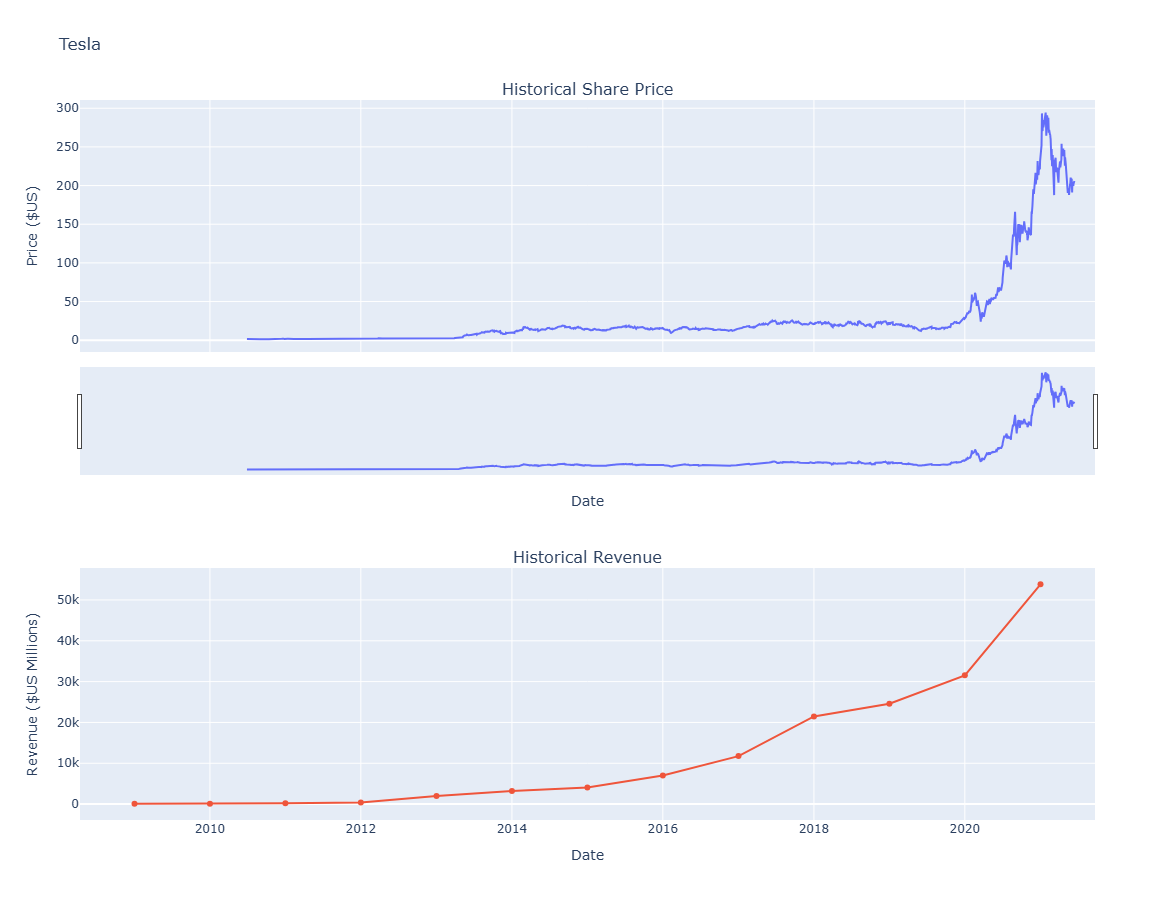

In [56]:
make_graph(tesla_data,tesla_revenue,'Tesla')

In [57]:
#Question 6: Plot GameStop Stock Graph
#Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

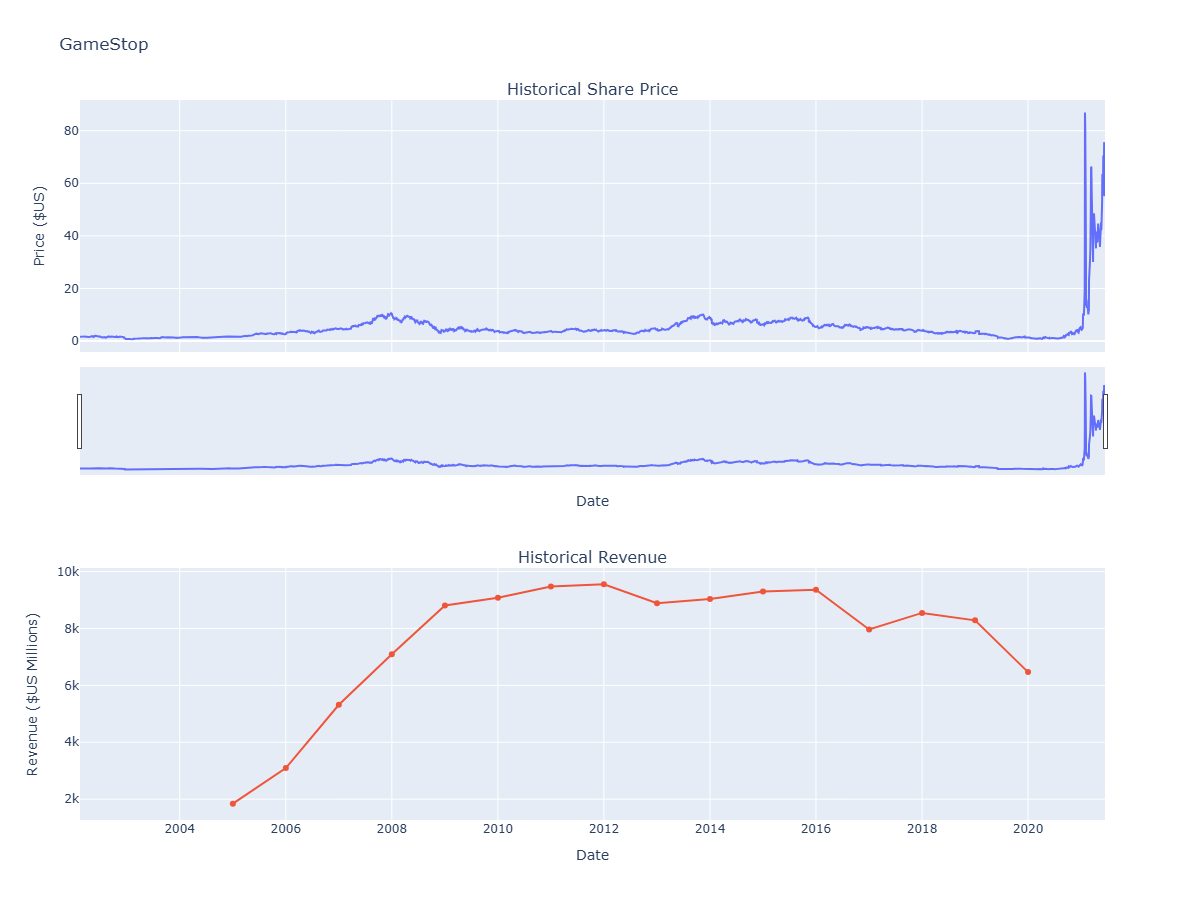

In [58]:
make_graph(gme_data,gme_revenue,'GameStop')